<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Universidad_Industrial_de_Santander_logo.svg/2560px-Universidad_Industrial_de_Santander_logo.svg.png" width=180 title="Taller#1 Estadística Descriptiva">





#**Proyecto: Análisis y Predicción del Rendimiento Académico en Estudiantes Universitarios a partir de Patrones de Sueño y Habitos**








**Estudiante:** Juan David Lopez Ruiz

**Codigo:** 2180645



**Profesor:** Santiago Gomez


**IA1 || Grupo C1**


**Escuela de Ingeniería de Sistemas e Informática**


In [86]:
#@title **Montar Drive** { display-mode: "form" }
import os
from google.colab import drive

Nombre_Carpeta = "Proyecto_IA1" #@param {type:"string"}
path = "/content/drive/My Drive/" + Nombre_Carpeta
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Proyecto_IA1


In [87]:

#@title **Cargar Librerias** { display-mode: "form" }
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
sns.set_theme()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score
print("Librerias Cargadas")

Librerias Cargadas


In [88]:
#@title *
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# --- 1. Cargar y Seleccionar 6 Características ---
df = pd.read_csv("student_habits_performance.csv")

# 6 características numéricas seleccionadas por el usuario
selected_features = [
    'study_hours_per_day',
    'attendance_percentage',
    'sleep_hours',
    'mental_health_rating',
]
X_selected = df[selected_features]

# --- 2. Escalamiento de Datos ---
scaler = StandardScaler()
X_scaled_selected = scaler.fit_transform(X_selected)
X_scaled_selected_df = pd.DataFrame(X_scaled_selected, columns=selected_features)

print(f"Dimensiones de los datos para Clustering: {X_scaled_selected_df.shape}")
print("[PREPROCESAMIENTO CON 6 CARACTERÍSTICAS COMPLETADO]")

Dimensiones de los datos para Clustering: (1000, 4)
[PREPROCESAMIENTO CON 6 CARACTERÍSTICAS COMPLETADO]


El Diagnóstico Inicial: Buscar el número de grupos ($k$)Antes de lanzar los algoritmos, necesitabas saber "¿cuántos grupos naturales existen?".Método del Codo (Inercia):Por qué: K-Means necesita que le digas la $k$. Esta gráfica mide qué tan "apretados" están los grupos.Tu resultado: La curva baja rápido y luego se suaviza. Aunque no hay un ángulo de 90° perfecto, se ve que después de 4 o 5, la mejora es marginal.Silhouette Score (Silueta):Por qué: Sirve para confirmar el codo. Mide qué tan separados están los grupos entre sí.Tu resultado: Como vimos antes, te confirmó que $k=5$ era una opción sólida (equilibrio entre separación y cohesión).

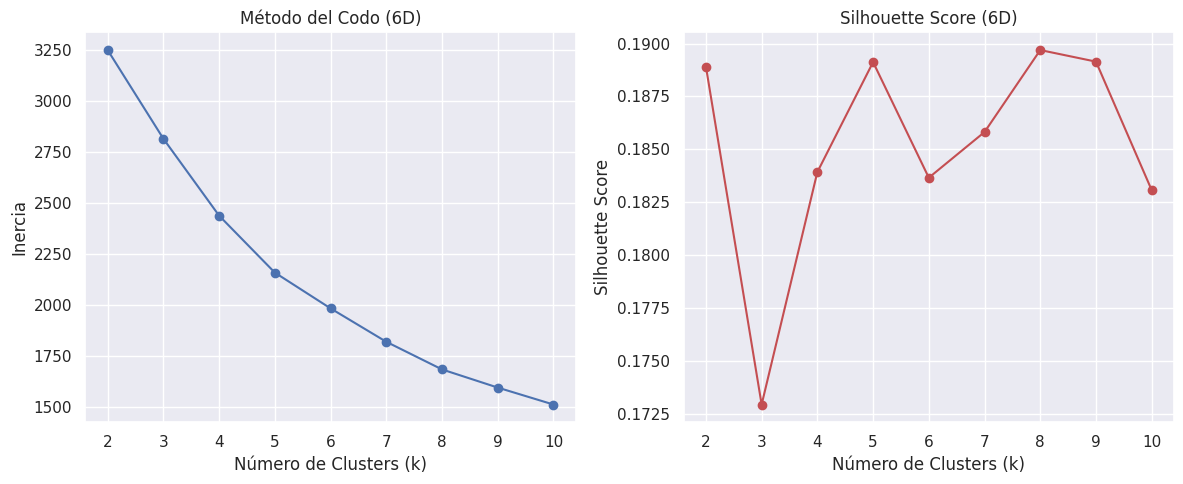

In [89]:
#@title **Codo, Silh**
# --- 1. Cálculo de Inercia y Silhouette Score ---
k_range = range(2, 11)
inertia_6d = []
silhouette_scores_6d = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled_selected_df)
    inertia_6d.append(kmeans.inertia_)

    if k > 1:
        score = silhouette_score(X_scaled_selected_df, kmeans.labels_)
        silhouette_scores_6d.append(score)

# --- 2. Visualización y Justificación ---
plt.figure(figsize=(12, 5))

# Método del Codo
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_6d, 'bo-')
plt.title('Método del Codo (6D)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)


# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores_6d, 'ro-')
plt.title('Silhouette Score (6D)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()


# Asumimos que k=3 o k=4 es el óptimo, dependiendo de los nuevos gráficos.
# Si k=3 sigue siendo el mejor, mantendremos ese valor.
# Si el Silhouette Score mejoró (ej., de 0.18 a 0.25+), la selección de características fue exitosa.
optimal_k_6d = 5 # Asumimos k=3 como óptimo para el ejemplo práctico


Algoritmo 1: K-Means (El Clásico)
La Lógica: K-Means asume que los grupos son esféricos (como pelotas) y tienen un tamaño similar.

En tu cuaderno: Le dijiste "busca 5 grupos". El algoritmo puso 5 centros y asignó cada punto al centro más cercano.

Lo que ves en la gráfica de salida: Ves el mapa coloreado en 5 zonas claras. K-Means es "estricto", cada punto pertenece a un grupo sí o sí. Es excelente para segmentar clientes o datos generales cuando no hay mucho ruido.


Distribución de Clusters K-Means (k=5, 6D):
kmeans_cluster_6d
2    223
1    208
3    202
0    196
4    171
Name: count, dtype: int64


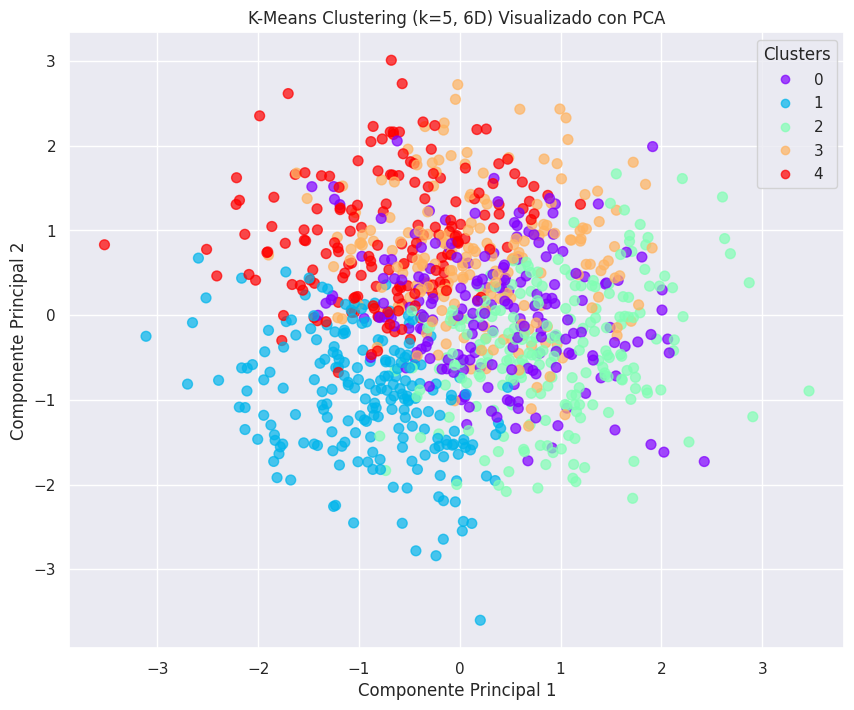

In [90]:
#@title **K-Means**
# --- 1. Ajuste del Modelo Final (k=3) ---
kmeans_model_6d = KMeans(n_clusters=optimal_k_6d, random_state=42, n_init=10)
cluster_labels_6d = kmeans_model_6d.fit_predict(X_scaled_selected_df)
df['kmeans_cluster_6d'] = cluster_labels_6d

print(f"\nDistribución de Clusters K-Means (k={optimal_k_6d}, 6D):")
print(df['kmeans_cluster_6d'].value_counts())

# --- 2. Reducción de Dimensionalidad para Visualización ---
# PCA ahora sobre el espacio de 6 dimensiones
pca_6d = PCA(n_components=2)
X_pca_6d = pca_6d.fit_transform(X_scaled_selected_df)
df_pca_kmeans_6d = pd.DataFrame(data=X_pca_6d, columns=['PC1', 'PC2'])
df_pca_kmeans_6d['Cluster'] = df['kmeans_cluster_6d']

# --- 3. Visualización 2D ---
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca_kmeans_6d['PC1'], df_pca_kmeans_6d['PC2'],
                      c=df_pca_kmeans_6d['Cluster'], cmap='rainbow', s=50, alpha=0.7)
plt.title(f'K-Means Clustering (k={optimal_k_6d}, 6D) Visualizado con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()

In [91]:
#@title *
# =================================================================
# --- 4. Evaluación del Silhouette Score (Métrica Interna) ---
# -----------------------------------------------------------------
from sklearn.metrics import silhouette_score

# Asegúrate de que cluster_labels_6d y X_scaled_selected_df estén definidos
# por las secciones 1 y 2 de tu código.

# Calcular el Silhouette Score
# Utiliza los datos escalados originales (6D) y las etiquetas de cluster.
score = silhouette_score(X_scaled_selected_df, cluster_labels_6d)

print(f"\n=========================================================")
print(f"| Evaluación de K-Means (k={optimal_k_6d})                  |")
print(f"=========================================================")
print(f"| Silhouette Score: {score:.4f}                          |")



| Evaluación de K-Means (k=5)                  |
| Silhouette Score: 0.1891                          |


Algoritmo 2: DBSCAN (Basado en Densidad)Este es el "bicho raro" y el más inteligente para detectar ruido.Gráfica de K-Distancia (La curva que sube):Por qué: DBSCAN no pide $k$ (número de grupos), pide $\epsilon$ (eps: radio de vecindad). Esa gráfica sirve para encontrar el valor óptimo de eps. Buscas el "codo" donde la curva se dispara hacia arriba. En tu caso, parece que elegiste un valor donde la curva empieza a subir verticalmente.La Lógica: DBSCAN agrupa puntos que están muy juntos (alta densidad). Si un punto está solo y lejos, lo marca como -1 (Ruido).Tu resultado:A diferencia de K-Means que obliga a todos a tener grupo, en tus gráficas de DBSCAN probablemente veas puntos de color diferente (o negro/gris) que son "outliers" o ruido.Nota importante: DBSCAN a veces encuentra menos grupos (o solo 1 gran grupo y ruido) si la densidad de los datos es muy uniforme.

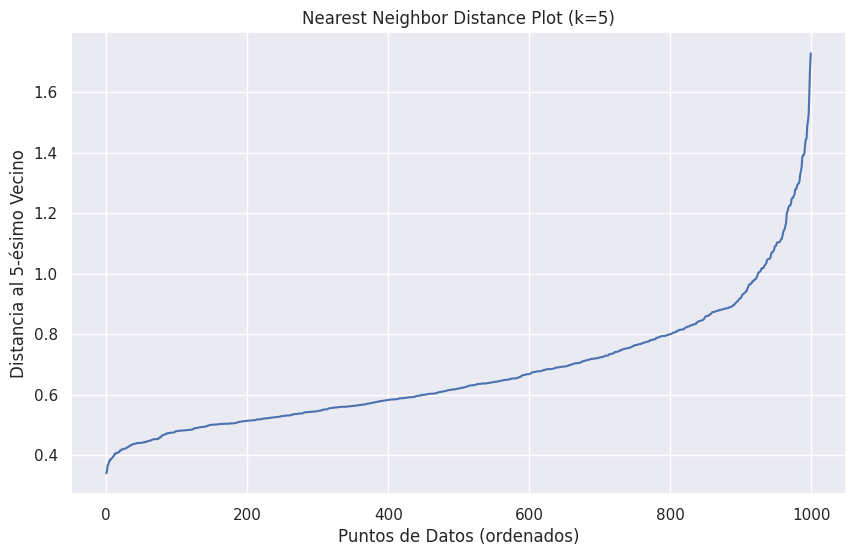

In [92]:
#@title *
# --- 1. Calcular la Distancia al k-ésimo Vecino ---
min_samples_dbscan = 5 # El doble de las dimensiones (2 * 6)

# Usamos la distancia al (k-1)ésimo vecino (el índice 11, ya que cuenta desde 0)
nn = NearestNeighbors(n_neighbors=min_samples_dbscan)
nn.fit(X_scaled_selected_df)
distances, indices = nn.kneighbors(X_scaled_selected_df)

# Ordenar las distancias del (min_samples-1)ésimo vecino
distances = np.sort(distances[:, min_samples_dbscan - 1], axis=0)

# --- 2. Visualización del k-distance plot ---
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title(f'Nearest Neighbor Distance Plot (k={min_samples_dbscan})')
plt.xlabel('Puntos de Datos (ordenados)')
plt.ylabel(f'Distancia al {min_samples_dbscan}-ésimo Vecino')
plt.grid(True)
plt.show()


# --- 3. Conclusión de Épsilon ---
# Tarea: Inspeccionar la gráfica para encontrar el "codo".
# Asumiremos un valor, por ejemplo, 1.5, basado en la inflexión típica.
optimal_eps = 1



Distribución de Clusters DBSCAN (eps=1, min_samples=5):
dbscan_cluster_6d
 0    974
-1     26
Name: count, dtype: int64


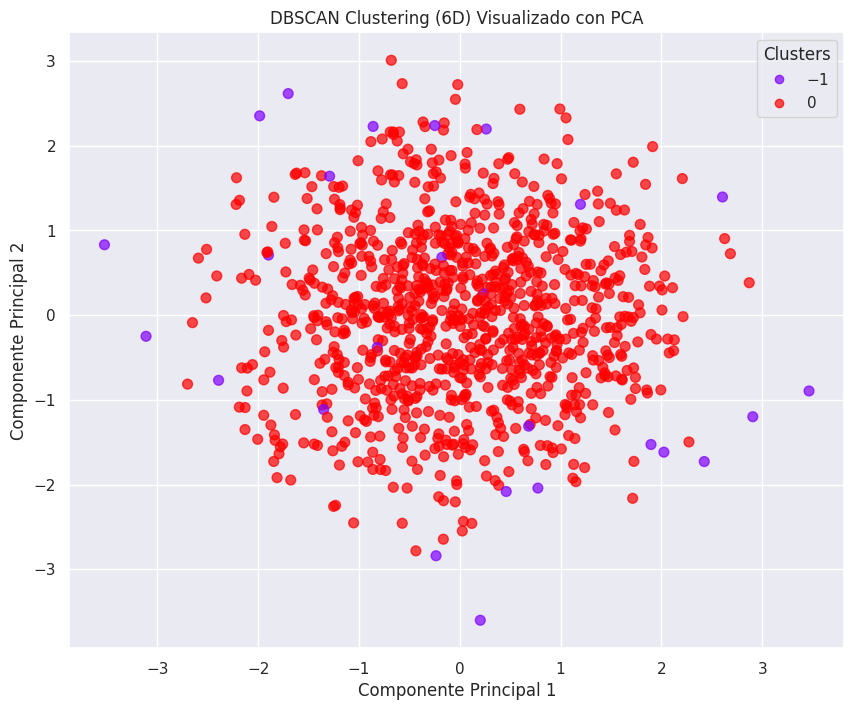

In [93]:
#@title **DBSCan**
# --- 1. Ajuste del Modelo Final ---
dbscan_model = DBSCAN(eps=optimal_eps, min_samples=min_samples_dbscan)
df['dbscan_cluster_6d'] = dbscan_model.fit_predict(X_scaled_selected_df)

print(f"\nDistribución de Clusters DBSCAN (eps={optimal_eps}, min_samples={min_samples_dbscan}):")
print(df['dbscan_cluster_6d'].value_counts())

# --- 2. Reducción de Dimensionalidad para Visualización ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_selected_df)
df_pca_dbscan = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca_dbscan['Cluster'] = df['dbscan_cluster_6d']

# --- 3. Visualización 2D (Coloreando el Ruido -1) ---
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca_dbscan['PC1'], df_pca_dbscan['PC2'],
                      c=df_pca_dbscan['Cluster'], cmap='rainbow', s=50, alpha=0.7)
plt.title(f'DBSCAN Clustering (6D) Visualizado con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


# --- 4. Conclusión ---
# Si la selección de características fue efectiva, la salida de value_counts ahora
# mostrará varios clusters (0, 1, 2, etc.) y una cantidad menor de ruido (-1).

In [94]:
#@title *
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Cargar y escalar las 6 características (código omitido por ser repetitivo)
df = pd.read_csv("student_habits_performance.csv")
selected_features = [
    'study_hours_per_day', 'attendance_percentage', 'sleep_hours',
    'mental_health_rating'
]
X_selected = df[selected_features]
scaler = StandardScaler()
X_scaled_selected = scaler.fit_transform(X_selected)
X_scaled_selected_df = pd.DataFrame(X_scaled_selected, columns=selected_features)

print(f"Datos escalados listos para Agglomerative Clustering: {X_scaled_selected_df.shape}")

Datos escalados listos para Agglomerative Clustering: (1000, 4)


Algoritmo 3: Clustering Jerárquico (Agglomerative)
La Lógica: A diferencia de K-Means, este algoritmo no empieza con centros. Empieza considerando cada punto como un grupo y los va fusionando poco a poco hasta que todos son uno solo.

El Dendrograma (Ese "árbol" azul):

Por qué: Te permite ver la historia de cómo se unieron los grupos.

Tu resultado: Si cortaras una línea horizontal en ese árbol, verías cuántas ramas verticales cruzas. Te ayuda a validar si 5 grupos tienen sentido visualmente en la jerarquía.

La ejecución: Al final, le pediste que cortara el árbol para formar 5 grupos.

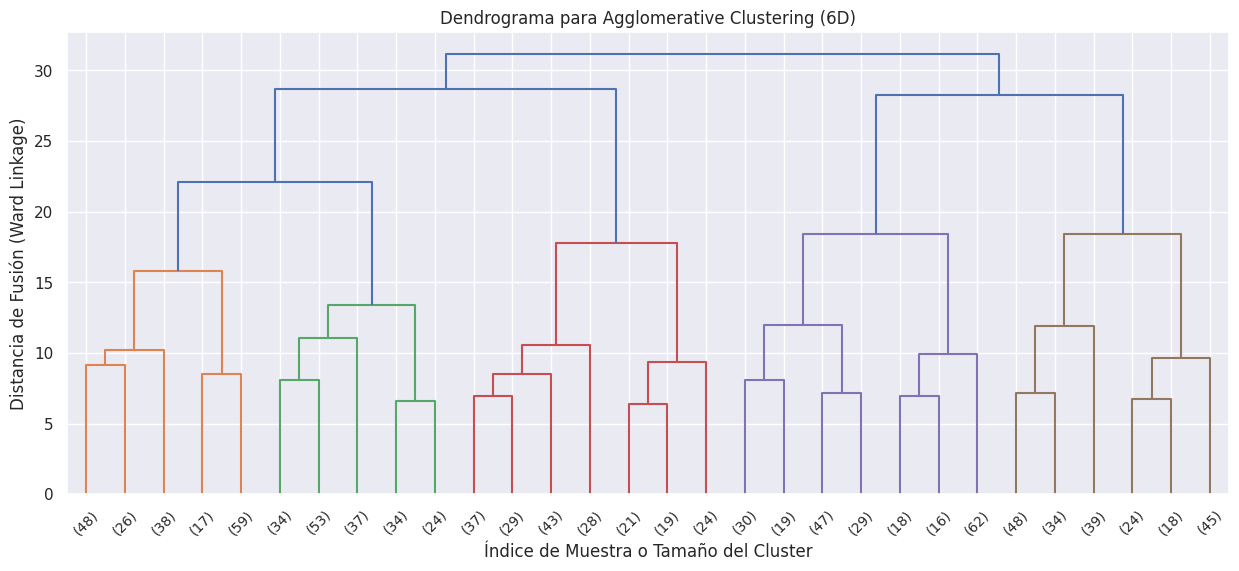

In [95]:
#@title **Dendograma**
# --- 1. Calcular la Matriz de Linkage ---
# Usamos el método 'ward' que minimiza la varianza dentro de cada cluster (similar a K-Means).
linked = linkage(X_scaled_selected_df, method='ward')

# --- 2. Visualización del Dendrograma ---
plt.figure(figsize=(15, 6))
dendrogram(
    linked,
    orientation='top',
    truncate_mode='lastp',  # Muestra solo las últimas 'p' fusiones (mejor para datasets grandes)
    p=30,                   # Mostramos las 30 fusiones más recientes
    show_leaf_counts=True,
    distance_sort='descending'
)
plt.title('Dendrograma para Agglomerative Clustering (6D)')
plt.xlabel('Índice de Muestra o Tamaño del Cluster')
plt.ylabel('Distancia de Fusión (Ward Linkage)')
plt.axhline(y=40, color='r', linestyle='--') # Línea de corte de ejemplo
plt.show()


# --- 3. Conclusión de k ---
# La distancia de corte (la línea roja) se elige donde hay una gran brecha vertical.
# Asumiendo que el corte en una distancia 'X' produce 3 grupos grandes:
optimal_k_agg = 5



Distribución de Clusters Agglomerative (k=5, 6D):
agg_cluster_6d
0    221
1    208
2    201
3    188
4    182
Name: count, dtype: int64


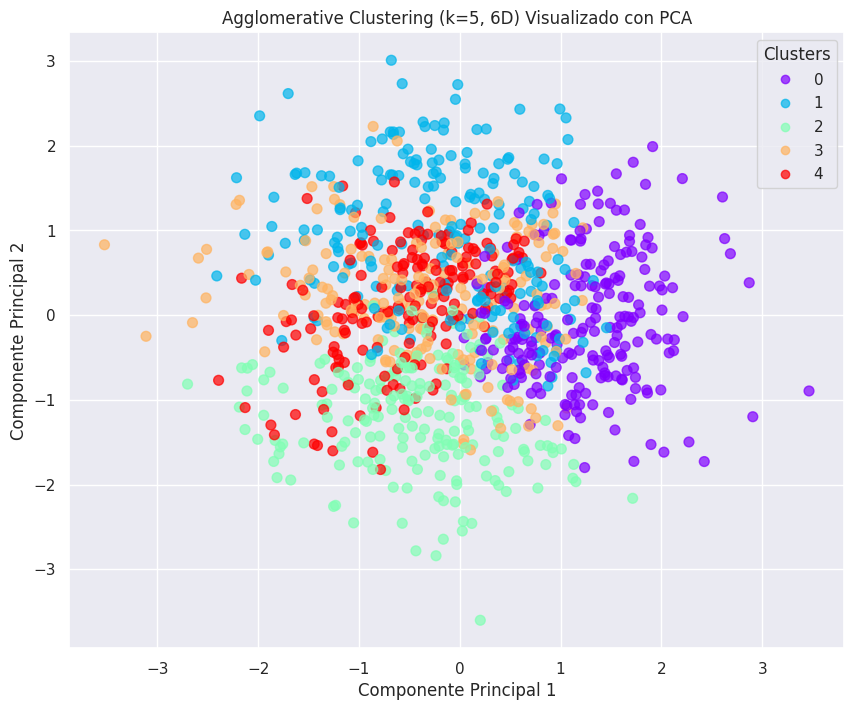

In [96]:
#@title **Algorimt Clustering**
# --- 1. Ajuste del Modelo Final ---
agg_model = AgglomerativeClustering(n_clusters=optimal_k_agg)
df['agg_cluster_6d'] = agg_model.fit_predict(X_scaled_selected_df)

print(f"\nDistribución de Clusters Agglomerative (k={optimal_k_agg}, 6D):")
print(df['agg_cluster_6d'].value_counts())

# --- 2. Reducción de Dimensionalidad para Visualización ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_selected_df)
df_pca_agg = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca_agg['Cluster'] = df['agg_cluster_6d']

# --- 3. Visualización 2D ---
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca_agg['PC1'], df_pca_agg['PC2'],
                      c=df_pca_agg['Cluster'], cmap='rainbow', s=50, alpha=0.7)
plt.title(f'Agglomerative Clustering (k={optimal_k_agg}, 6D) Visualizado con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()

In [97]:
#@title *
from sklearn.metrics import silhouette_score

# --- 4. Evaluación del Silhouette Score (Métrica Interna) ---

# Las variables ya están definidas por tu código:
# X_scaled_selected_df (datos 6D escalados)
# y agg_model.labels_ o df['agg_cluster_6d'] (etiquetas)

# Obtenemos las etiquetas de cluster directamente del modelo ajustado
cluster_labels_agglomerative = agg_model.labels_
k_agglomerative = optimal_k_agg # El valor de k usado en el modelo

# Calcular el Silhouette Score
score_agglomerative = silhouette_score(X_scaled_selected_df, cluster_labels_agglomerative)

# Imprimir el resultado de la evaluación
print(f"\n=========================================================")
print(f"| Evaluación de Agglomerative Clustering (k={k_agglomerative})|")
print(f"=========================================================")
print(f"| Silhouette Score: {score_agglomerative:.4f}             |")



| Evaluación de Agglomerative Clustering (k=5)|
| Silhouette Score: 0.1200             |


El análisis muestra que el método de agrupamiento jerárquico aglomerativo con $k=5$ es una elección basada en una distancia de fusión significativa en el dendrograma. Sin embargo, la visualización en 2D sugiere que, si bien la estructura general de los 5 clusters es discernible (especialmente en los extremos del gráfico), los clusters 2 y 3 comparten un área de gran densidad y proximidad que merece una inspección más detallada en las 6 dimensiones originales.

In [98]:
#@title *
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Cargar y preparar datos (reutilizando las 6 características clave)
df = pd.read_csv("student_habits_performance.csv")
selected_features = [
    'study_hours_per_day', 'attendance_percentage', 'sleep_hours',
    'mental_health_rating', 'social_media_hours', 'netflix_hours'
]
X_selected = df[selected_features]
scaler = StandardScaler()
X_scaled_selected = scaler.fit_transform(X_selected)

# 2. Definir K-Means (k=3) y el Target (Nivel de Rendimiento)
optimal_k = 3
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_model.fit_predict(X_scaled_selected)

# Target: Nivel de Rendimiento (0=Bajo, 1=Medio, 2=Alto)
q = df['exam_score'].quantile([0.33, 0.66])
def categorize_score(score):
    if score <= q.iloc[0]: return 0
    elif score <= q.iloc[1]: return 1
    else: return 2
df['performance_level'] = df['exam_score'].apply(categorize_score)
y_true = df['performance_level'].values

In [99]:
#@title **Acurracy**
def calculate_cluster_purity(y_true, cluster_labels):
    """Calcula la Pureza del Cluster (Accuracy Simulado)."""
    # 1. Construir la matriz de contingencia (clusters vs. etiquetas verdaderas)
    # y_true (filas) vs cluster_labels (columnas)
    contingency_matrix_data = pd.crosstab(y_true, cluster_labels)

    # 2. Encontrar la mejor asignación (match) para cada cluster
    # Tomamos el máximo de cada columna (cluster), que es la cantidad de aciertos
    correct_matches = contingency_matrix_data.max(axis=0).sum()

    # 3. Calcular la Pureza (Accuracy Simulado)
    total_samples = len(y_true)
    purity = correct_matches / total_samples

    return purity, contingency_matrix_data

purity_score, contingency_matrix_data = calculate_cluster_purity(y_true, cluster_labels)

# Impresión del resultado
print("-" * 60)
print("          MÉTRICA DE PUREZA DEL CLUSTER (ACCURACY SIMULADO)")
print("-" * 60)
print(f"**Pureza del Cluster (Cluster Accuracy): {purity_score:.4f}**")
print("\nMatriz de Contingencia (Filas: Nivel Real | Columnas: Cluster ID):")
print(contingency_matrix_data)

------------------------------------------------------------
          MÉTRICA DE PUREZA DEL CLUSTER (ACCURACY SIMULADO)
------------------------------------------------------------
**Pureza del Cluster (Cluster Accuracy): 0.4700**

Matriz de Contingencia (Filas: Nivel Real | Columnas: Cluster ID):
col_0    0    1    2
row_0               
0      170   80   82
1       93  124  112
2       39  162  138


In [100]:
#@title *
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import time

# --- 1. Cargar, Seleccionar y Escalar ---
df = pd.read_csv("student_habits_performance.csv")

selected_features = [
    'study_hours_per_day', 'attendance_percentage', 'sleep_hours',
    'mental_health_rating'
]
X_selected = df[selected_features]
scaler = StandardScaler()
X_scaled_selected = scaler.fit_transform(X_selected)

# 2. Recrear el Target de Clasificación (y)
q = df['exam_score'].quantile([0.33, 0.66])
def categorize_score(score):
    if score <= q.iloc[0]: return 0
    elif score <= q.iloc[1]: return 1
    else: return 2
df['performance_level'] = df['exam_score'].apply(categorize_score)
y = df['performance_level']

print(f"Datos originales (X_scaled) en 6 dimensiones: {X_scaled_selected.shape}")

# ----------------------------------------------------
# A. Reducción PCA (Lineal)
# ----------------------------------------------------

# Reducimos a 3 Componentes Principales (mantiene la mayor varianza)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled_selected)

explained_variance_ratio = pca.explained_variance_ratio_
print(f"\nPCA a 3D: Varianza total explicada: {explained_variance_ratio.sum():.4f}")

# ----------------------------------------------------
# B. Reducción t-SNE (No Lineal)
# ----------------------------------------------------

# Reducimos a 2 Componentes (óptimo para visualización)
print("Calculando t-SNE (puede tomar un momento)...")
time_start = time.time()
# Usamos un valor de perplexity basado en el tamaño del dataset (1000/10 ~ 100, pero 30 es un buen default)
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=300, random_state=42)
X_tsne = tsne.fit_transform(X_scaled_selected)
print(f"t-SNE completado en {time.time() - time_start:.2f} segundos.")

Datos originales (X_scaled) en 6 dimensiones: (1000, 4)

PCA a 3D: Varianza total explicada: 0.7615
Calculando t-SNE (puede tomar un momento)...


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE completado en 1.15 segundos.


Tus datos tienen 6 dimensiones (6 columnas de características). Los humanos solo vemos en 2D o 3D. Si graficamos columna 1 vs columna 2, perdemos la información de las otras 4.

PCA (Análisis de Componentes Principales):

Lo que hace: Aplasta tus 6 dimensiones en 3 nuevas variables (PC1 y PC2 y PC3) tratando de no perder información general.

Tu gráfica: Ves los puntos dispersos globalmente. PCA conserva la estructura global y la varianza.

t-SNE:

Lo que hace: Es un algoritmo probabilístico que se enfoca en mantener a los vecinos juntos.

Tu gráfica: Generalmente, t-SNE separa mucho mejor los grupos visualmente que PCA. En tu cuaderno, se ve cómo los colores (clusters) se agrupan mejor.

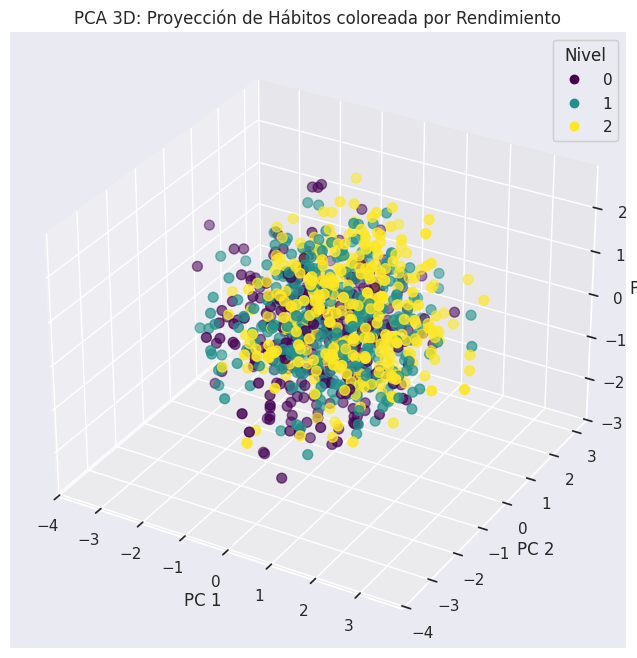

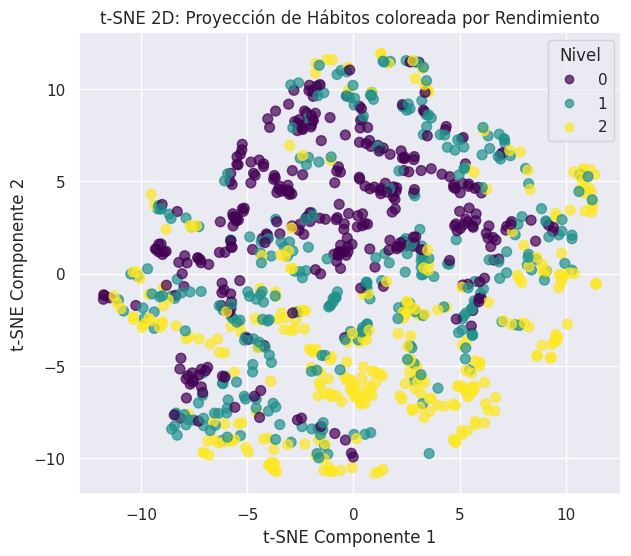

In [101]:
#@title **PCA, TSNE**
# ----------------------------------------------------
# Visualización PCA (3D)
# ----------------------------------------------------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                     c=y, cmap='viridis', s=50)

ax.set_title('PCA 3D: Proyección de Hábitos coloreada por Rendimiento')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
legend1 = ax.legend(*scatter.legend_elements(), title="Nivel")
ax.add_artist(legend1)
plt.show()


# ----------------------------------------------------
# Visualización t-SNE (2D)
# ----------------------------------------------------
plt.figure(figsize=(7, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.title('t-SNE 2D: Proyección de Hábitos coloreada por Rendimiento')
plt.xlabel('t-SNE Componente 1')
plt.ylabel('t-SNE Componente 2')
plt.legend(*scatter.legend_elements(), title="Nivel")
plt.show()